# Overview Materi

Jelaskan secara singkat perbedaan antara bagging dan boosting menurut pemahamanmu!

bagging : teknik menggabungkan beberapa model yang sudah di training secara agregasi untuk mengurangi varians

boosting : teknik memprediksi langkah selanjutnya dengan fokus memperbaiki kesalahan yang sudah dilakukan di prediksi sebelumnya untuk mengurangi bias


# Import Data & Libraries

In [1]:
# import semua libraries yang akan dibutuhkan
!pip install scikit-learn xgboost lightgbm catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.0 MB/s eta 0:00:00


In [3]:
# Import library
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

#Load Dataset Breast Cancer
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
import warnings

In [7]:
# import data dari datasets.load_breast_cancer

data = load_breast_cancer()

# subsetting data
X = data.data
y = data.target

# split data dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=42)

In [8]:
# ubah data ke dalam bentuk dataframe agar bisa ditampilkan dalam .head()
df_X = pd.DataFrame(data.data, columns=data.feature_names)
df_y = pd.DataFrame(data.target, columns=['Target'])

In [9]:
df_X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# Bagging from Scratch

## Random Forest Classifier - Sklearn

In [25]:
clf = RandomForestClassifier() # gunakan RandomForestClassifier dari Sklearn
clf.fit(X_train, y_train)
preds = clf.predict(X_test)

# print score menggunakan metrik accuracy
print("Accuracy:", accuracy_score(y_test, preds))

Accuracy: 0.9649122807017544


## Random Forest from Scratch
Source: https://www.youtube.com/watch?v=kFwe2ZZU7yw

In [41]:
from collections import Counter

In [53]:
class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feature=None, random_state=None):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_features = n_feature
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier(max_depth=self.max_depth,
                                    min_samples_split=self.min_samples_split)

            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, n_samples, replace = True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common

    def predict(self, X):
       predictions = np.array([tree.predict(X) for tree in self.trees])
       tree_preds = np.swapaxes(predictions, 0, 1)
       predictions = np.array([self._most_common_label(tree_pred) for tree_pred in tree_preds])
       return predictions

## Predict Using Random Forest

In [60]:
def acr(y_true, y_pred):
    acr1 = np.sum(y_true == y_pred) / len(y_true)
    return acr1

clf = RandomForest()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# print score menggunakan metrik accuracy
acc = acr(y_test, predictions)
print(acc)

0.956140350877193


# Boosting From Scratch

## Gradient Boosting Classifier - Sklearn

In [61]:
# define and train the model using GradientBoostingClassifier from Sklearn
grb = RandomForestClassifier() # gunakan RandomForestClassifier dari Sklearn
grb.fit(X_train, y_train)

preds = grb.predict(X_test)

# print score menggunakan metrik accuracy
print ("Accuracy:", accuracy_score(y_test, preds))

Accuracy: 0.956140350877193


## Gradient Boosting from Scratch with Decision Tree
Source: https://www.youtube.com/watch?v=Pq2mmJxjs1o

In [72]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import explained_variance_score

In [73]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class gradientBoostingRegressor:
    def __init__(self, lr=0.1, n_estimators=25, base_learner=DecisionTreeRegressor):
        self.lr = lr
        self.n_estimators = n_estimators
        self.base_learner = base_learner


    def fit(self, X, y, **params):
        self.base_models = []

        Fm = np.zeros_like(y, dtype=float)

        _, axs = plt.subplots(5, 5, figsize=(10, 10))
        axs = axs.flatten()

        for i in range(self.n_estimators):
            r_i = y - sigmoid(Fm)
            h_i = self.base_learner(**params)
            h_i.fit(X, r_i)
            self.base_models.append(h_i)

            # update the model
            Fm = Fm + self.lr*h_i.predict(X)

            # Plotting
            axs[i].plot(y, ".")
            axs[i].plot(Fm, ".")
            axs[i].set_title(str(i))
            axs[i].axis("off")

        plt.tight_layout()
        plt.show()

    def predict(self, X):
        Fm = np.zeros(X.shape[0])
        for h_i in self.base_models:
            Fm += self.lr * h_i.predict(X)

        probs = sigmoid(Fm)

        return (probs >= 0.5).astype(int)


## Predict Using Gradient Boosting

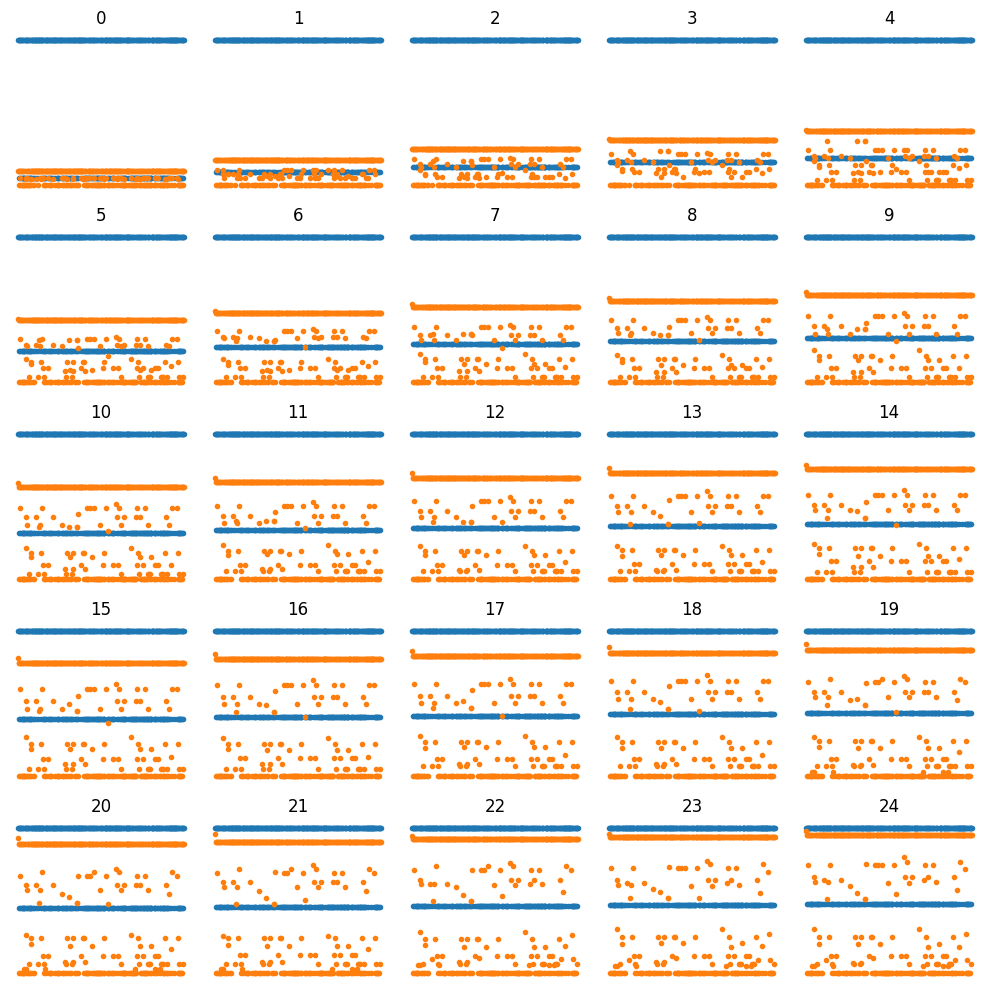

In [74]:
# define and train the model
model = gradientBoostingRegressor()
r = model.fit(X_train, y_train, max_depth=2)

In [75]:
# get predictions:
preds = model.predict(X_test)

# print score menggunakan metrik accuracy
score = explained_variance_score(y_test, preds)
print("model score: ", score)

model score:  0.8136259416966918


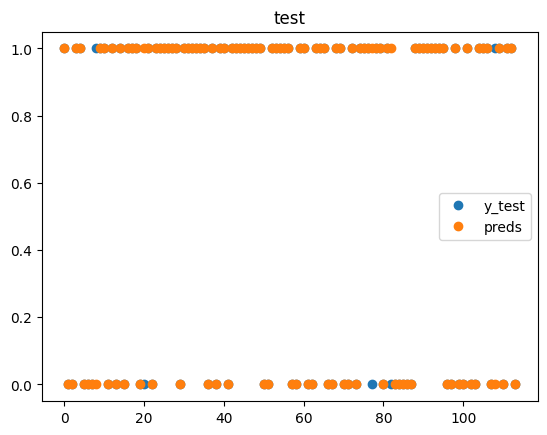

In [76]:
# plot predictions vs. the ground truth:
_, ax = plt.subplots(1, 1)
plt.title('test')
ax.plot(y_test, 'o', label = 'y_test')
ax.plot(preds, 'o', label = 'preds')
ax.legend()
plt.show()